Manager fills you in about a discussion among executives from Marketing and Wealth Management regarding the hypothesis that clients with more kinds of products at the bank keep more deposit dollars here.  Your manager asks you to investigate this issue and prepare a report that can go to the executives from both departments, as well as to the Chief Deposit Officer.  For this purpose, it is sufficient to consider three broad product categories: deposits (checking and savings), loans (assets borrowed from the bank), and wealth management (stocks and bonds).

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline

acctdf = pd.read_csv("data/AccountTable.csv")
clientdf = pd.read_csv('data/ClientTable.csv')
bridgedf = pd.read_csv('data/ClientAcctFact.csv')

display(acctdf.head())
display(clientdf.head())
display(bridgedf.head())

print("Account table dimensions: ", acctdf.shape)
print("Client table dimensions: ", clientdf.shape)
print('Client-account bridge table dimensions: ', bridgedf.shape)

,AccountBalance,AccountID,AccountStatus,AccountType
0,25127.38,44363,open,D
1,25662.58,36801,open,D
2,3149.79,38963,open,D
3,870489.00,53464,open,L
4,714025.00,30787,open,L


,ClientID,Gender,Name,Region
0,1353110,M,Zeus Odetta,NE
1,168163,M,Eliza Aye,SW
2,7170,M,Claude Janissa,SE
3,747320,F,Coreena Renada,NE
4,754670,M,Laurance Kalishia,NE


,AccountID,ClientID
0,44363,1353110
1,36801,1353110
2,38963,1353110
3,53464,1353110
4,30787,1353110


Account table dimensions:  (4139, 4)
Client table dimensions:  (902, 4)
Client-account bridge table dimensions:  (4139, 2)


### How many clients are in the bank?

In [17]:
clientdf.nunique()

ClientID    902
Gender        2
Name        902
Region        4
dtype: int64

### How many clients are in each region?

In [18]:
clientdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ClientID  902 non-null    int64 
 1   Gender    902 non-null    object
 2   Name      902 non-null    object
 3   Region    902 non-null    object
dtypes: int64(1), object(3)
memory usage: 28.3+ KB


In [19]:
clientdf.groupby(['Region']).count()

,ClientID,Gender,Name
Region,,,
NE,421,421,421
NW,115,115,115
SE,195,195,195
SW,171,171,171


### Create a bar plot of gender frequency

In [20]:
clientdf.groupby(['Gender']).count() # checking numbers first

,ClientID,Name,Region
Gender,,,
F,542,542,542
M,360,360,360


Text(0, 0.5, 'Count')

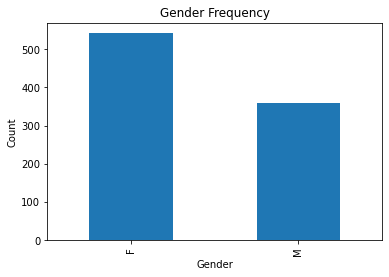

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
clientdf['Gender'].value_counts().plot(ax=ax, kind='bar')
plt.title('Gender Frequency')
plt.xlabel('Gender')
plt.ylabel('Count')

# Account Table Questions

### What percentage of all accounts are a) open and b) closed?

In [22]:
acctdf.groupby(['AccountStatus']).count()

,AccountBalance,AccountID,AccountType
AccountStatus,,,
closed,440,440,440
open,3476,3476,3476
unknown,223,223,223


In [23]:
3476 / (3476 + 440 + 223) # open accounts

0.8398163807683016

In [24]:
1 - 0.8398163807683016  # closed accounts

0.16018361923169844

### What percentage of D accounts are closed?

In [25]:
subacct = acctdf[acctdf.AccountType=='D']

In [26]:
subacct.groupby(['AccountStatus']).count()

,AccountBalance,AccountID,AccountType
AccountStatus,,,
closed,263,263,263
open,2089,2089,2089
unknown,119,119,119


In [27]:
2089 / (2089 + 263 + 119) # open accounts

0.8454067179279644

In [28]:
1 - 0.8454067179279644 # closed accounts

0.1545932820720356

# Combined Client and Account table

### Merge the Client and Account tables together

In [31]:
bridge_merge = acctdf.merge(bridgedf, how='left', on='AccountID')

In [32]:
client_account = bridge_merge.merge(clientdf, how='left', on='ClientID')

In [33]:
client_account

,AccountBalance,AccountID,AccountStatus,AccountType,ClientID,Gender,Name,Region
0,25127.38,44363,open,D,1353110,M,Zeus Odetta,NE
1,25662.58,36801,open,D,1353110,M,Zeus Odetta,NE
2,3149.79,38963,open,D,1353110,M,Zeus Odetta,NE
3,870489.00,53464,open,L,1353110,M,Zeus Odetta,NE
4,714025.00,30787,open,L,1353110,M,Zeus Odetta,NE
...,...,...,...,...,...,...,...,...
4134,31167.25,27512,open,D,1214409,M,Rashaud Misbah,NE
4135,26082.99,53984,open,D,1214409,M,Rashaud Misbah,NE
4136,7793.58,91076,open,D,1214409,M,Rashaud Misbah,NE
4137,23565.76,82041,open,D,1163216,M,Eryk Alanys,NE


#### Create a new field in the merged table called 'ClientType' that tells you the type of open accounts that each client has. For example, if a client currently has a D, L and W account, the ClientType would be 'DLW'. If a client only has an open D and L account then the ClientType would be 'DL'.

In [34]:
grouped = client_account.groupby("ClientID")

In [35]:
types = grouped["AccountType"].agg(lambda x: "".join(set(x))); types

ClientID
784         LW
1291         W
7138       LWD
7170         D
7475        WD
          ... 
1812169      D
1813135      D
1813552      W
1819047    LWD
1823488    LWD
Name: AccountType, Length: 812, dtype: object

In [36]:
typesdf = types.to_frame().reset_index()

In [37]:
typesdf = typesdf.rename(columns={"AccountType": "ClientType"})

In [38]:
client_account = client_account.merge(typesdf, how='left', on='ClientID')

In [39]:
client_account

,AccountBalance,AccountID,AccountStatus,AccountType,ClientID,Gender,Name,Region,ClientType
0,25127.38,44363,open,D,1353110,M,Zeus Odetta,NE,LWD
1,25662.58,36801,open,D,1353110,M,Zeus Odetta,NE,LWD
2,3149.79,38963,open,D,1353110,M,Zeus Odetta,NE,LWD
3,870489.00,53464,open,L,1353110,M,Zeus Odetta,NE,LWD
4,714025.00,30787,open,L,1353110,M,Zeus Odetta,NE,LWD
...,...,...,...,...,...,...,...,...,...
4134,31167.25,27512,open,D,1214409,M,Rashaud Misbah,NE,D
4135,26082.99,53984,open,D,1214409,M,Rashaud Misbah,NE,D
4136,7793.58,91076,open,D,1214409,M,Rashaud Misbah,NE,D
4137,23565.76,82041,open,D,1163216,M,Eryk Alanys,NE,D


### How many different client types are there?

In [40]:
len(client_account.groupby(['ClientType']).count())

7

<div style="color: green;">
ANSWER: There are 7 client types
</div>

### How many clients have open accounts of all three product types (D, L, and W)?  How do you know your answer is correct?

In [43]:
all_three_open = client_account[(client_account.ClientType=='LWD') & (client_account.AccountStatus=='open')]

In [44]:
all_three_open

,AccountBalance,AccountID,AccountStatus,AccountType,ClientID,Gender,Name,Region,ClientType
0,25127.38,44363,open,D,1353110,M,Zeus Odetta,NE,LWD
1,25662.58,36801,open,D,1353110,M,Zeus Odetta,NE,LWD
2,3149.79,38963,open,D,1353110,M,Zeus Odetta,NE,LWD
3,870489.00,53464,open,L,1353110,M,Zeus Odetta,NE,LWD
4,714025.00,30787,open,L,1353110,M,Zeus Odetta,NE,LWD
...,...,...,...,...,...,...,...,...,...
4125,1065024.00,7774,open,L,622355,F,Tawanna Harbert,NE,LWD
4126,898704.00,1840,open,L,622355,F,Tawanna Harbert,NE,LWD
4127,797449.00,8559,open,W,622355,F,Tawanna Harbert,NE,LWD
4128,1311025.00,51904,open,W,622355,F,Tawanna Harbert,NE,LWD


In [45]:
len(all_three_open.groupby(['ClientID']).count())

88

### What is the average balance for open W accounts among clients that have at least two open L accounts?  How do you know your answer is correct?

In [48]:
client_account.groupby(['ClientType']).count()

,AccountBalance,AccountID,AccountStatus,AccountType,ClientID,Gender,Name,Region
ClientType,,,,,,,,
D,846,846,846,846,846,846,846,846
L,65,65,65,65,65,65,65,65
LD,673,673,673,673,673,673,673,673
LW,164,164,164,164,164,164,164,164
LWD,1511,1511,1511,1511,1511,1511,1511,1511
W,225,225,225,225,225,225,225,225
WD,655,655,655,655,655,655,655,655


In [49]:
def lacc(account):
    return 1 if account in ["LD", "LWD", "WD", "L", "LW"] else 0
    

In [50]:
client_account['l_accounts'] = client_account['ClientType'].apply(lacc)

In [51]:
client_account.sample(10) 

,AccountBalance,AccountID,AccountStatus,AccountType,ClientID,Gender,Name,Region,ClientType,l_accounts
2498,39694.29,65325,open,D,319192,M,Valerian Caroyl,NE,LD,1
3126,2412.76,53476,open,D,275141,F,Alta Shekina,SW,WD,1
1610,1507984.00,74314,open,W,244544,F,Violet Tawni,SE,LWD,1
62,469225.00,21128,open,L,1482526,M,Josejuan Peretz,NE,LD,1
3741,913936.00,89843,open,L,516051,F,Joette Merly,SE,L,1
30,6327.69,35195,open,D,754670,M,Laurance Kalishia,NE,LD,1
258,614656.00,36778,open,W,1592970,F,Raena Clora,NE,WD,1
1755,5068.53,49445,open,D,395522,F,Elaina Ynez,NW,LD,1
4060,13542.63,68842,open,D,1588940,F,Reece Aime,NE,D,0
2618,24575.87,82122,open,D,39481,M,Bee Lou,NW,LD,1


In [52]:
laccount_open = client_account[client_account.AccountStatus=='open']

In [53]:
laccount_open.sample(10)

,AccountBalance,AccountID,AccountStatus,AccountType,ClientID,Gender,Name,Region,ClientType,l_accounts
2971,44101.48,13947,open,D,1231556,F,Alee Orianna,SE,D,0
2720,33495.84,47980,open,D,718113,F,Dan Kourtney,SW,LWD,1
4000,20447.51,36226,open,D,1665591,F,Emmry Enrike,NW,LWD,1
2517,47840.47,50646,open,D,625740,F,Durinda Jarvis,NE,WD,1
2325,31441.24,7999,open,D,109501,M,Eston Hadley,SW,LD,1
169,683929.00,52541,open,L,1240877,M,Izaac Valene,NE,LW,1
3518,1218816.00,40241,open,L,466307,F,Cherly Antoinetta,NE,LW,1
3766,26079.29,49196,open,D,646731,F,Leeanne Valora,SE,LWD,1
1028,921600.00,85198,open,L,1218949,M,Dontarious Jacklyn,NE,LWD,1
766,910116.00,25166,open,W,799795,F,Nuria Gordon,NW,LW,1


In [54]:
grouped_l = laccount_open.groupby(['ClientID'])['l_accounts'].count()

In [55]:
laccount_open[laccount_open.ClientID==7138] # checking manually

,AccountBalance,AccountID,AccountStatus,AccountType,ClientID,Gender,Name,Region,ClientType,l_accounts
3108,18216.68,44179,open,D,7138,M,Charlie Hollyann,NE,LWD,1
3109,16361.82,49499,open,D,7138,M,Charlie Hollyann,NE,LWD,1
3110,27356.92,70114,open,D,7138,M,Charlie Hollyann,NE,LWD,1
3112,13892.17,92926,open,D,7138,M,Charlie Hollyann,NE,LWD,1
3113,20891.90,21301,open,D,7138,M,Charlie Hollyann,NE,LWD,1
3114,27039.62,84004,open,D,7138,M,Charlie Hollyann,NE,LWD,1
3115,24172.89,65817,open,D,7138,M,Charlie Hollyann,NE,LWD,1
3116,11713.15,11904,open,D,7138,M,Charlie Hollyann,NE,LWD,1
3117,3768.84,52451,open,D,7138,M,Charlie Hollyann,NE,LWD,1
3118,1008016.00,46304,open,L,7138,M,Charlie Hollyann,NE,LWD,1


In [56]:
grouped_ldf = grouped_l.to_frame().reset_index()

In [57]:
grouped_ldf = grouped_ldf.rename(columns={"l_accounts": "l_accounts_count"})

In [58]:
grouped_ldf = grouped_ldf[grouped_ldf.l_accounts_count>=2]

In [59]:
grouped_ldf.sample(10)

,ClientID,l_accounts_count
418,979521,8
48,100781,3
429,1009784,2
4,7475,3
188,407628,3
433,1019337,15
0,784,7
645,1516097,2
463,1081374,3
560,1335789,4


In [60]:
mergeddf = client_account.merge(grouped_ldf, how='inner', on='ClientID')

In [61]:
mergeddf.sample(20)

,AccountBalance,AccountID,AccountStatus,AccountType,ClientID,Gender,Name,Region,ClientType,l_accounts,l_accounts_count
1799,1605289.00,7365,open,L,1645912,M,Zyan Cordell,SW,LW,1,5
3423,2835856.00,62891,unknown,W,285558,F,Joetta Gillie,NE,LWD,1,9
2462,6288.11,24134,open,D,62708,F,Isabelle Charletta,SE,LWD,1,14
845,4083.41,86120,unknown,D,902245,M,Lovett Derrian,SE,D,0,3
1061,24790.44,91540,open,D,1530584,F,Emmali Alen,NE,D,0,6
1375,45807.93,81479,open,D,1173697,F,Kabrina Shirly,SE,D,0,2
1077,603729.00,81455,open,W,1296112,M,Elio Hezekiah,SW,LW,1,3
3152,10290.24,74773,open,D,177447,M,Tilden Maria,SE,D,0,3
3430,1283689.00,56278,open,W,444999,F,Solveig Muhammed,SW,WD,1,7
783,912025.00,31273,open,W,1261822,F,Jaine Darline,SE,LW,1,3


In [62]:
mergeddf = mergeddf[(mergeddf.AccountStatus=='open') & (mergeddf.l_accounts==1)]

In [63]:
mergeddf.describe()

,AccountBalance,AccountID,ClientID,l_accounts,l_accounts_count
count,2.549000e+03,2549.000000,2.549000e+03,2549.0,2549.000000
mean,4.989052e+05,50325.855630,8.759329e+05,1.0,10.322087
std,6.216003e+05,29022.015108,5.310893e+05,0.0,5.436827
min,1.688000e+01,76.000000,7.840000e+02,1.0,2.000000
25%,2.136900e+04,25118.000000,3.968690e+05,1.0,6.000000
50%,5.120143e+04,49731.000000,8.355530e+05,1.0,9.000000
75%,9.196810e+05,75369.000000,1.367636e+06,1.0,15.000000
max,3.508129e+06,99891.000000,1.823488e+06,1.0,24.000000


In [65]:
round(sum(mergeddf.AccountBalance)/len(mergeddf), 2) # average balance

498905.18


They hypothesize that clients with more product types also have more **deposit** dollars with us.  Let's provide evidence either for or against this hypothesis.  


In [ ]:
# creating a continous feauture for ClientType

In [66]:
client_account.groupby(['ClientType']).count()

,AccountBalance,AccountID,AccountStatus,AccountType,ClientID,Gender,Name,Region,l_accounts
ClientType,,,,,,,,,
D,846,846,846,846,846,846,846,846,846
L,65,65,65,65,65,65,65,65,65
LD,673,673,673,673,673,673,673,673,673
LW,164,164,164,164,164,164,164,164,164
LWD,1511,1511,1511,1511,1511,1511,1511,1511,1511
W,225,225,225,225,225,225,225,225,225
WD,655,655,655,655,655,655,655,655,655


In [67]:
def encoder(x):
    if x == 'D' or x == 'L' or x == 'W':
        return 1
    elif x == 'LD' or x == 'WD' or x == 'LW':
        return 2
    elif x == 'LWD':
        return 3
    else:
        return None

In [68]:
client_account['type_features'] = client_account.ClientType.apply(encoder)

In [69]:
client_account.sample(10)

,AccountBalance,AccountID,AccountStatus,AccountType,ClientID,Gender,Name,Region,ClientType,l_accounts,type_features
3300,46078.53,13655,open,D,398549,F,Cassondra Leonila,NE,LWD,1,3
3564,431649.00,7598,open,W,1535283,F,Maryum Alton,NE,LW,1,2
2496,12743.74,60602,closed,D,319192,M,Valerian Caroyl,NE,LD,1,2
303,1062961.00,43548,unknown,W,761567,F,Peggie Farris,NW,LWD,1,3
2119,960400.00,92420,open,L,251464,M,Isamu Hatim,SW,LWD,1,3
1209,18219.20,76549,open,D,1652617,M,Markavious Adi,NW,WD,1,2
373,232.47,93606,open,D,1620112,M,Kardell Hallee,NE,D,0,1
3422,16083.00,51948,closed,D,1682633,M,Zamar Antoine,NE,LD,1,2
2300,1002001.00,79381,open,L,1162345,M,Nam Eliane,SW,LWD,1,3
1918,722500.00,62562,open,W,1645912,M,Zyan Cordell,SW,LW,1,2


In [272]:
# DESCRIPTIVE ANALYSIS

In [71]:
import seaborn as sns

<AxesSubplot:xlabel='type_features', ylabel='AccountBalance'>

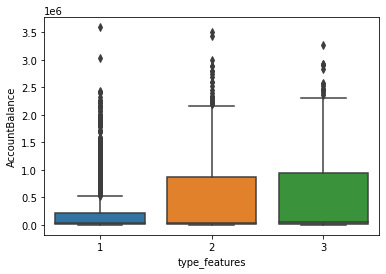

In [72]:
sns.boxplot(x='type_features', y = 'AccountBalance', data=client_account)

<div style="color: green;">
descriptive plot shows that there is some relationship among type features. Yet, although clients with 2 or 3 
product types do have more account balance than those with only 1 product type, no differences in mean scores is observed
between clients with 2 types and those with 3 types. There seems to be nonlinear relationship between types and balance
</div>

#### Statistical Analysis

<div style="color: green;">
I will be using Ordinary Least Squares model for two reasons.
1. The label, account balance, is continous in nature
2. OLS is known to be a good model for interpretability: explaining relationships compared to prediction.
There are some conditions though: the relationship must be linear (which we saw above that it may not be) and 
other assumptions of OLS are met (I will touch upon some of them after fitting the data)
</div>

In [73]:
from statsmodels.formula.api import ols

In [74]:
model = ols(formula='AccountBalance ~ type_features', data=client_account).fit()

In [75]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         AccountBalance   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     87.48
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.36e-20
Time:                        21:40:40   Log-Likelihood:                -60923.
No. Observations:                4139   AIC:                         1.218e+05
Df Residuals:                    4137   BIC:                         1.219e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.088e+05   2.61e+04      7.988

<div style="color: green;">
The results show that the coefficiant of type_features is positive and statistically significant (p value is very low and F statistics is high )
yet there might be some issues:
there's likely coorelation of error terms and/or non-constant variance of error terms - we see that standard errors
are super large in the model and this is one sign of this issue. We can also see that since the same client has the  
same values of type_features over many observations the assumption that data points are independent of each other is violated. I will account for this issue and retest the relationship later in this section
</div>

In [1]:
# First I add other features in the data to account for any potential ommitted variable bias. The results are the 
# same as above

In [76]:
def myfunc(x):
    return 1 if x == 'M' else 0

In [77]:
client_account['gender_2'] = client_account['Gender'].apply(myfunc) # no need actually for this, model converts them

In [78]:
model2 = ols(formula='AccountBalance ~ type_features + gender_2 + AccountStatus + Region', data=client_account).fit()

In [79]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         AccountBalance   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     13.42
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           3.04e-17
Time:                        21:40:48   Log-Likelihood:                -60920.
No. Observations:                4139   AIC:                         1.219e+05
Df Residuals:                    4131   BIC:                         1.219e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

<div style="color: green;">
To minimize the above mentioned violation of indepence of observations I subset the data looking at the average values of AccountBalance and type_features grouping for each client. The result is the opposite. The regression results show that there is no longer a statistical significant relationship between product types and AccountBalance. 
</div>

In [80]:
vars = ['AccountBalance', 'type_features', 'ClientID']

In [81]:
short_df = client_account[vars]

In [82]:
short_df  = short_df.groupby('ClientID').mean()

<AxesSubplot:xlabel='type_features', ylabel='AccountBalance'>

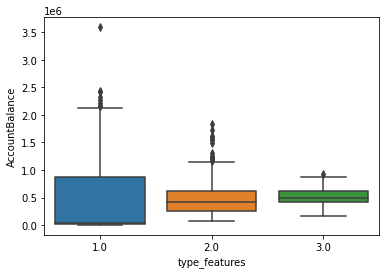

In [83]:
sns.boxplot(x='type_features', y = 'AccountBalance', data=short_df)

In [84]:
model3 = ols(formula='AccountBalance ~ type_features', data=short_df).fit()

In [85]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         AccountBalance   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.115
Date:                Sat, 11 Jun 2022   Prob (F-statistic):             0.0780
Time:                        21:40:55   Log-Likelihood:                -11804.
No. Observations:                 812   AIC:                         2.361e+04
Df Residuals:                     810   BIC:                         2.362e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.948e+05    4.3e+04      9.173